# EDA on Online Retail transactions Dataset
**Life cycle of Exploratory Data Analysis**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing

## About the dataset
The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies. The dataset is well-suited for data analysis and machine learning applications, as it contains a large volume of transactional data that can be used to train predictive models and make data-driven decisions.

## Column Description
* StockCode: A code used to identify the product that was purchased
* Description: A brief description of the product that was purchased
* Quantity: The quantity of the product that was purchased
* InvoiceDate: The date and time that the purchase was made
* UnitPrice: The price of one unit of the product that was purchased
* CustomerID: The unique identifier for the customer who made the purchase
* Country: The country where the customer who made the purchase is located

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
## Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)

In [187]:
df= pd.read_csv("E://Technical//DS_AI_ML//ml_project_bootcamp//assignment//dataset1//Online Retail.csv")

In [188]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [189]:
df.shape

(541909, 8)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [191]:
## Checking the null values of each column
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

Description is the only column having null values.

In [192]:
stock= df["StockCode"].value_counts()
print (stock)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64


In [193]:
## Counting how many times each country is appearing in the Country column
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [194]:
## Satatistical information of the integer data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


In [195]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.003553
UnitPrice,-0.001235,1.000000,-0.002834
CustomerID,-0.003553,-0.002834,1.000000


<AxesSubplot: >

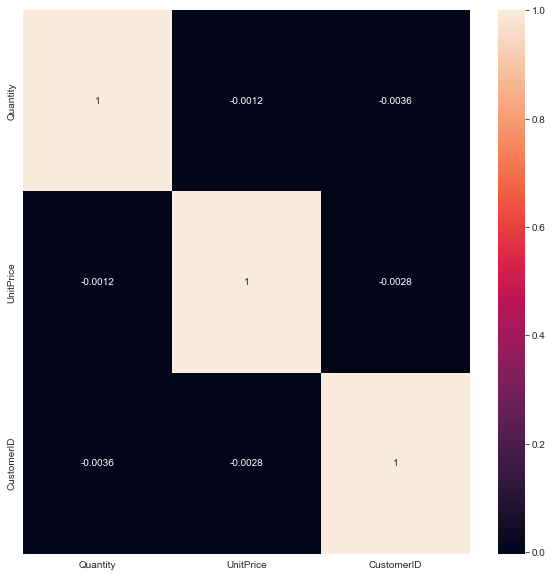

In [196]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

In [197]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [198]:
df.groupby(["CustomerID"])["Quantity"].value_counts()

CustomerID  Quantity
12346       -74215       1
             74215       1
12347        12         56
             4          32
             24         26
                        ..
18287        4           4
             20          2
             30          2
             18          1
             60          1
Name: Quantity, Length: 47627, dtype: int64

In [199]:
df.duplicated().sum()

5268

In [200]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [201]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: Description, Length: 4223, dtype: int64

In [202]:
idx_list = df[df['Description'].isnull()].index
print(idx_list)

Int64Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,
              2026,   2406,
            ...
            524473, 524475, 529667, 533711, 533712, 535322, 535326, 535332,
            536981, 538554],
           dtype='int64', length=1454)


In [203]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [204]:
# Store the stock code from missing value
list_stockcode_from_missing = []
for item in df[df['Description'].isnull()]['StockCode']:
    list_stockcode_from_missing.append(item)

In [205]:
# find most suitable description based on stock code
def isNaN(string):
    return string != string
list_description_for_missing = []

for idx,code in enumerate(df['StockCode']):
    for stock in list_stockcode_from_missing:
        if(code == stock):
            if(isNaN(df['Description'].iloc[idx])):
                continue
            list_description_for_missing.append(df['Description'].iloc[idx])
            break
    if(len(list_description_for_missing) == len(list_stockcode_from_missing)):
        break
        
len(list_description_for_missing)

1454

In [206]:
list_description_for_missing

['CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'RECIPE BOX WITH METAL HEART',
 'ALARM CLOCK BAKELIKE GREEN',
 'INFLATABLE POLITICAL GLOBE ',
 'POSTAGE',
 'HAND WARMER RED POLKA DOT',
 'HAND WARMER UNION JACK',
 'CREAM CUPID HEARTS COAT HANGER',
 'RETRO COFFEE MUGS ASSORTED',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'VICTORIAN SEWING BOX LARGE',
 'CREAM CUPID HEARTS COAT HANGER',
 'RETRO COFFEE MUGS ASSORTED',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'HOT WATER BOTTLE TEA AND SYMPATHY',
 'HAND WARMER RED POLKA DOT',
 'HAND WARMER UNION JACK',
 'JUMBO BAG CHARLIE AND LOLA TOYS',
 'RETROSPOT T

In [207]:
## Making a series of the description value I got for the Description Null values.
idx_list= df[df["Description"].isnull()].index
desc_data = pd.Series(list_description_for_missing,index = idx_list)

In [208]:
desc_data

622            CREAM CUPID HEARTS COAT HANGER
1970      KNITTED UNION FLAG HOT WATER BOTTLE
1971           RED WOOLLY HOTTIE WHITE HEART.
1972                   HAND WARMER UNION JACK
1987                HAND WARMER RED POLKA DOT
                         ...                 
535322                  WHITE WIRE EGG HOLDER
535326             WAKE UP COCKEREL TILE HOOK
535332            ENVELOPE 50 ROMANTIC IMAGES
536981             ENVELOPE 50 BLOSSOM IMAGES
538554                   JUMBO BAG STRAWBERRY
Length: 1454, dtype: object

In [209]:
## Filling the Description missing values
df["Description"].fillna(desc_data, inplace= True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [210]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [211]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [212]:
df.InvoiceDate= pd.to_datetime(df["InvoiceDate"], dayfirst = True)
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 536641, dtype: datetime64[ns]

In [213]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [214]:
## Let's create a seperate column for all the InvoiceDate column
df['year']= df['InvoiceDate'].dt.year

df["month"]= df["InvoiceDate"].dt.month

df["day"]= df["InvoiceDate"].dt.day

df["weekday"]= df["InvoiceDate"].dt.weekday

dw_mapping= {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

df["dayofweek"]= df["InvoiceDate"].dt.weekday.map(dw_mapping)

In [215]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday


In [216]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
year                    int64
month                   int64
day                     int64
weekday                 int64
dayofweek              object
dtype: object

In [217]:
## Calulating the sales price
df["sales"]= df["Quantity"]* df["UnitPrice"]
df["sales"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: sales, dtype: float64

In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,536641.0,15282.630153,1482.756881,12346.00,14367.00,15287.00,16241.00,18287.0
year,536641.0,2010.921771,0.268532,2010.00,2011.00,2011.00,2011.00,2011.0
month,536641.0,7.544820,3.508696,1.00,5.00,8.00,11.00,12.0
day,536641.0,15.024640,8.663351,1.00,7.00,15.00,22.00,31.0
weekday,536641.0,2.423889,1.839870,0.00,1.00,2.00,4.00,6.0
sales,536641.0,18.123861,380.656263,-168469.60,3.75,9.87,17.40,168469.6


## Exploratory Data Analysis
**Sales Distribution**
* Which country has the maximum customer?

* Which year has the most sales?

* Which country has the most transaction sales?

* Which month has the most sales?

* Which day has the most sales?

* Top 10 most purchased items.

In [219]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,4,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,4,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,4,Friday,16.60


**1. Which country has the maximum customer?** 

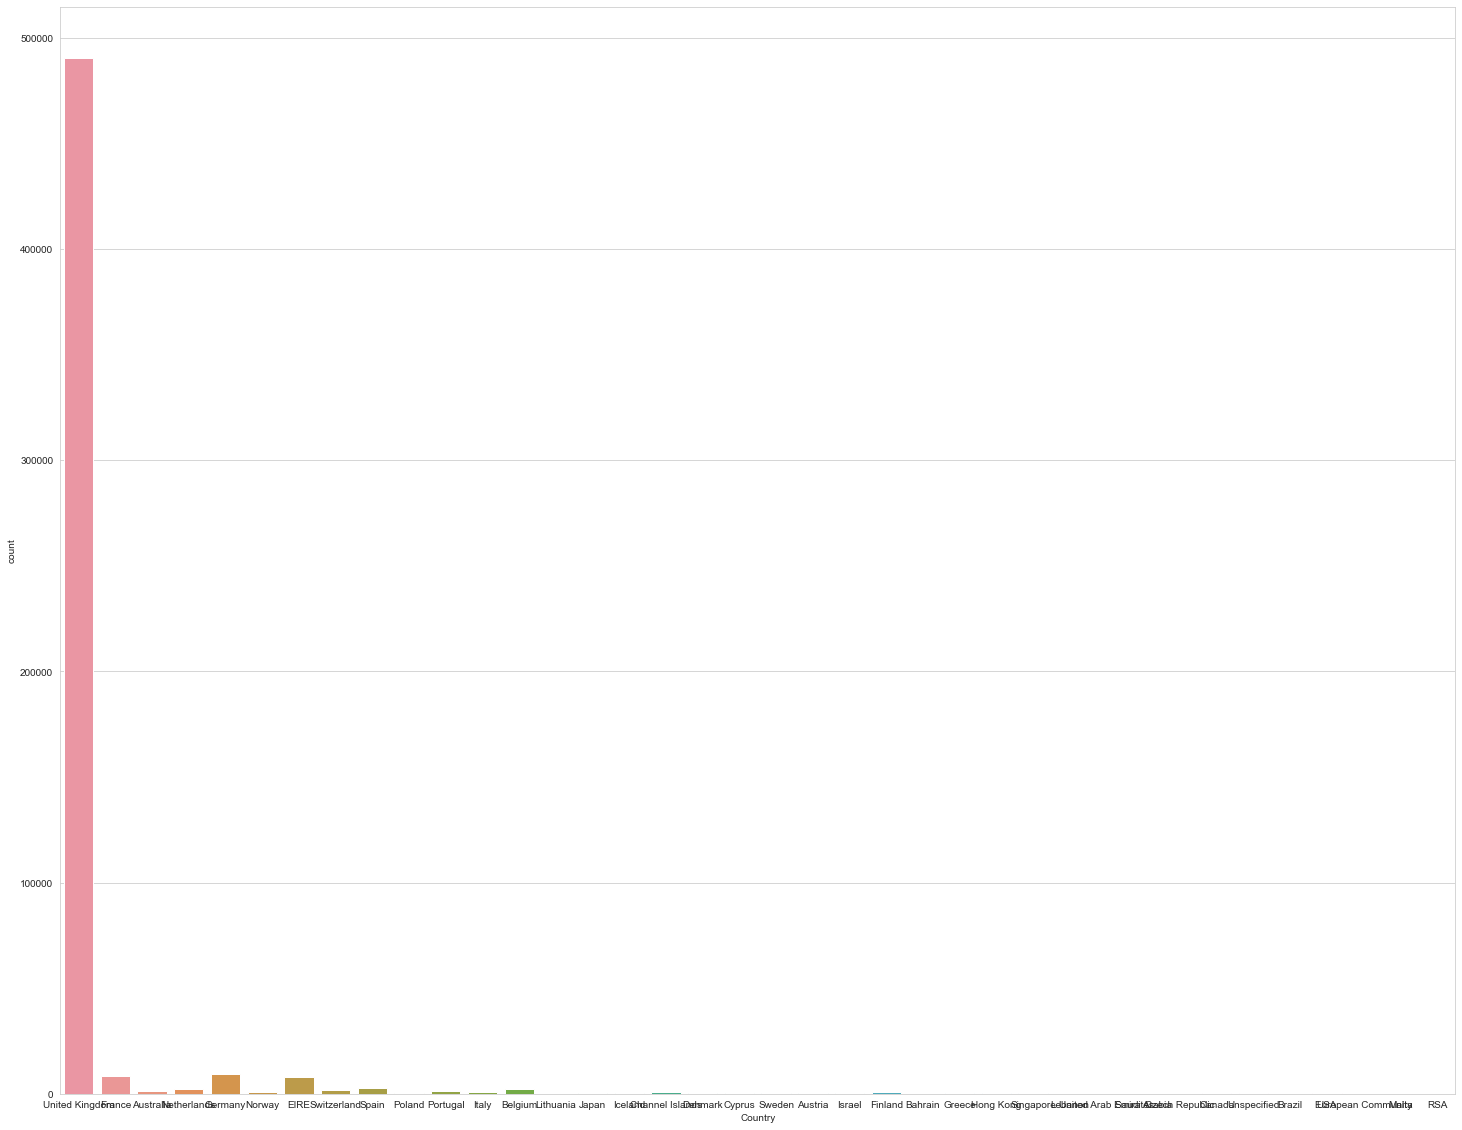

In [220]:
plt.subplots(figsize= (25,20))
sns.countplot(x='Country', data= df);

United Kingdom has the largest customer base

<AxesSubplot: ylabel='Country'>

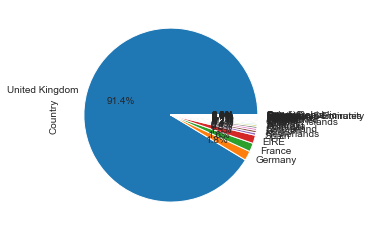

In [221]:
df["Country"].value_counts().plot(kind= "pie", autopct= "%0.1f%%")

Among all the countries 94% of the customer belongs to United Kingdom

**2. Which year has the most sales?** 

<AxesSubplot: xlabel='year'>

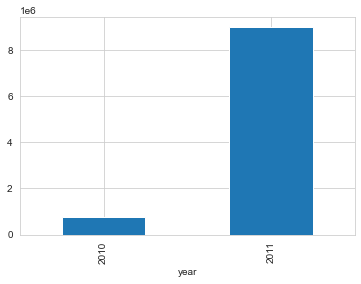

In [222]:
df.groupby(['year'])["sales"].sum().plot(kind= "bar")

Year 2011 has the largest sales.

In [223]:
df.groupby(['year'])["sales"].sum()

year
2010     746723.610
2011    8979283.344
Name: sales, dtype: float64

**3. Which country has the most transaction sales?**

<AxesSubplot: xlabel='Country'>

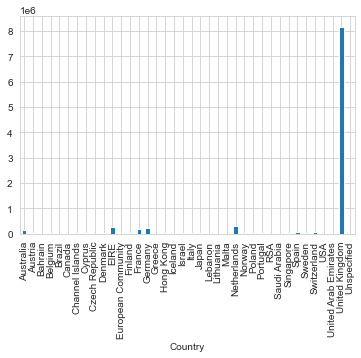

In [224]:
df.groupby(["Country"])["sales"].sum().plot(kind= "bar")

In [225]:
df.groupby(by=['Country'])["sales"].sum().sort_values(ascending=False)

Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

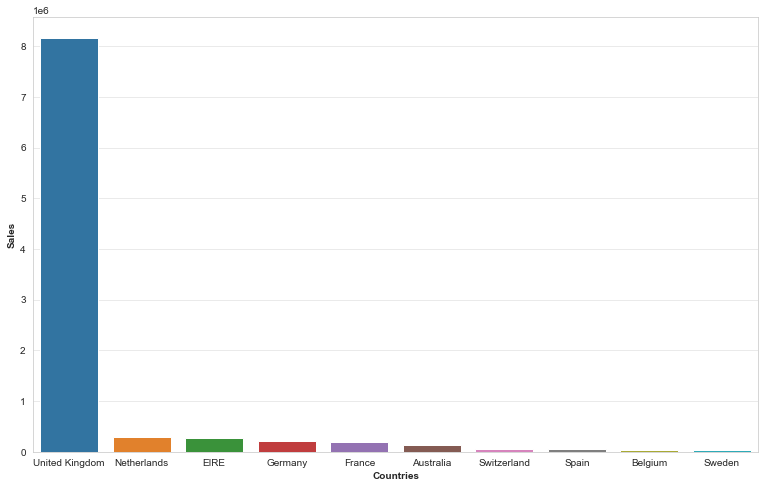

In [226]:
df_copy= df.groupby(by=['Country'])["sales"].sum().sort_values(ascending=False).reset_index()[:10]
sns.set_style("whitegrid")
plt.subplots(figsize=(13,8))
sns.barplot(x= df_copy["Country"], y= df_copy["sales"])
#plt.bar(df_copy["Country"], df_copy["sales"],color='red',width=0.4)
plt.xlabel("Countries", weight="bold")
plt.ylabel("Sales", weight="bold")
plt.grid(alpha=0.5, axis="y")

United Kingdom has the largest sales among all the countries then Netherlands, BRE and Germany

**4. Which month has the most sales?**

In [227]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34


In [228]:
df.groupby(by=['month']).sum()['sales'].sort_values(ascending=False)

month
11    1456145.800
12    1179424.670
10    1069368.230
9     1017596.682
5      722094.100
6      689977.230
3      682013.980
8      681386.460
7      680156.991
1      558448.560
2      497026.410
4      492367.841
Name: sales, dtype: float64

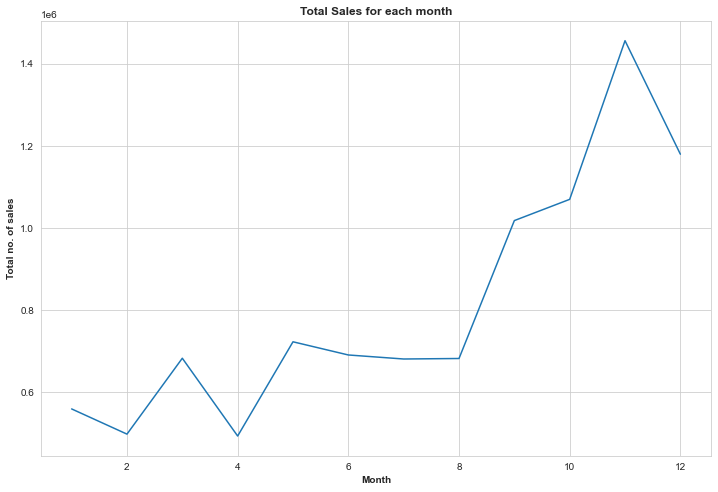

In [229]:
df.groupby(by=['month']).sum()['sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each month', weight= "bold")
plt.ylabel('Total no. of sales', weight= "bold")
plt.xlabel('Month', weight= "bold")
#plt.xticks(rotation=50)
plt.show()

11th month has the highest sales and 4th month has the lowest sales.

**5. Which day has the most sales?**

In [230]:
df.groupby(by=['dayofweek']).sum()['sales'].sort_values(ascending=False)

dayofweek
Thursday     2108701.530
Tuesday      1965703.611
Wednesday    1730088.430
Monday       1584895.301
Friday       1537958.621
Sunday        798659.461
Name: sales, dtype: float64

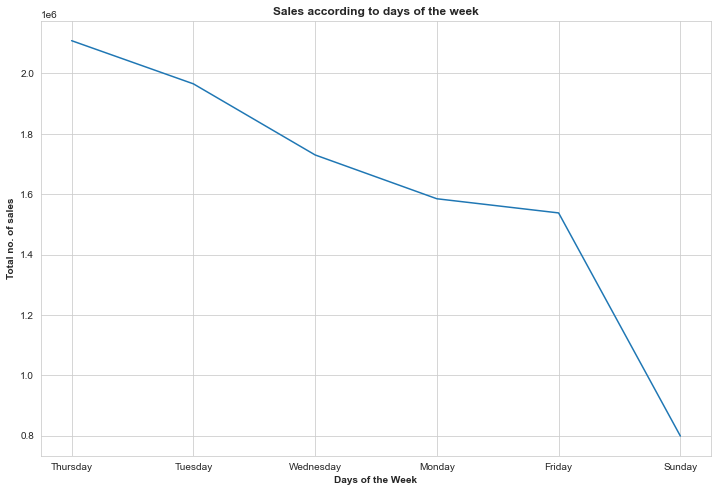

In [231]:
df.groupby(by=['dayofweek']).sum()['sales'].sort_values(ascending=False).plot(kind= "line", figsize=(12,8))
plt.title('Sales according to days of the week', weight= "bold")
plt.ylabel('Total no. of sales', weight= "bold")
plt.xlabel('Days of the Week', weight= "bold")
#plt.xticks(rotation=50)
plt.show()

Thursday has the highest sales and Sunday has the lowest sales.

**6. Top 10 most purchased item.**

In [232]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,weekday,dayofweek,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,2,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,2,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,2,Wednesday,20.34


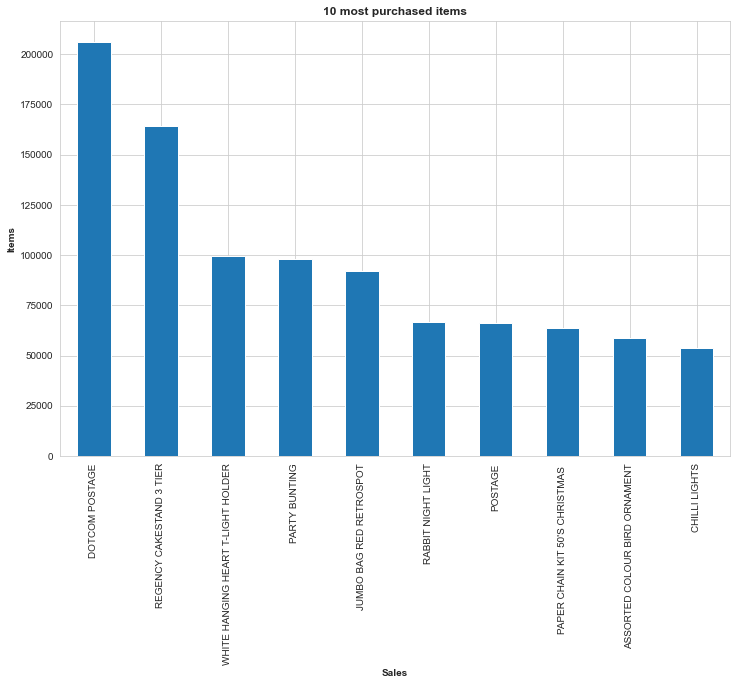

In [233]:
df.groupby(by=['Description']).sum()['sales'].sort_values(ascending=False)[:10].plot(kind= "bar", figsize=(12,8))
plt.title('10 most purchased items', weight= "bold")
plt.ylabel('Items', weight= "bold")
plt.xlabel('Sales', weight= "bold")
#plt.xticks(rotation=50)
plt.show()

DOTCOM POSTAGE has the highest sales